In [75]:
import numpy as np
import importlib
import utils
import optimizers
importlib.reload(utils)
importlib.reload(optimizers)
from utils import *
from optimizers import GradientDescent

In [76]:
N = 100
X = np.random.rand(N)
Y = np.sqrt(X) + np.random.randn(N)*X*0.1

VM = np.array([[p**k for k in range(4)] for p in X])

def f(w):
  r = VM@w-Y
  return 1/2*sum(r*r)

def grad_f(w):
  r = VM@w-Y
  return r@VM

In [54]:
w = np.zeros(4)
f(w)

23.258246539155607

In [79]:
gd = GradientDescent(input_size=4,
                     f=f,
                     grad_f=grad_f,
                     lr='wolfe')
w_opt, history = gd.run()

GD converged after 40086 iterations.


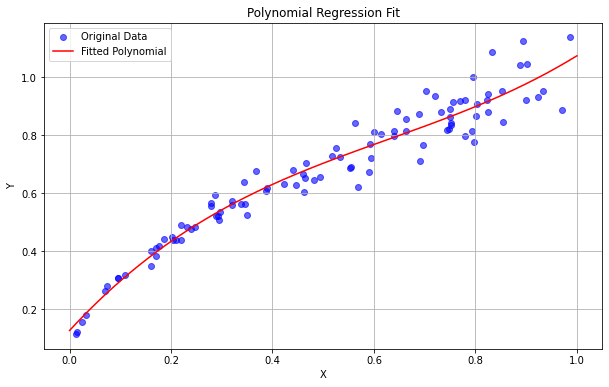

Polynomial coefficients (from lowest to highest degree):
Degree 0: 0.1274
Degree 1: 1.8976
Degree 2: -2.0281
Degree 3: 1.0771


In [80]:
import matplotlib.pyplot as plt

# Sort X and Y for plotting
sorted_indices = np.argsort(X)
X_sorted = X[sorted_indices]
Y_sorted = Y[sorted_indices]

# Generate points for the polynomial curve
X_curve = np.linspace(0, 1, 1000)
Y_curve = np.sum([w_opt[i] * X_curve**i for i in range(4)], axis=0)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_sorted, Y_sorted, color='blue', alpha=0.6, label='Original Data')
plt.plot(X_curve, Y_curve, color='red', label='Fitted Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients
print("Polynomial coefficients (from lowest to highest degree):")
for i, coef in enumerate(w_opt):
    print(f"Degree {i}: {coef:.4f}")

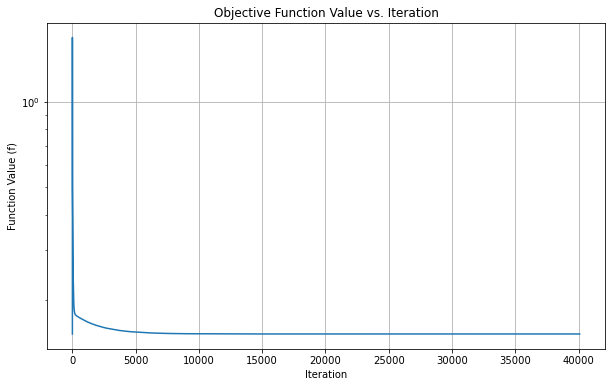

Initial function value: 1.5249e-01
Final function value: 1.5249e-01
Number of iterations: 40088
Relative decrease: 0.00%


In [83]:
import matplotlib.pyplot as plt

# Extract function values from history
f_values = [f(x) for x in history]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(f_values)), f_values)
plt.xlabel('Iteration')
plt.ylabel('Function Value (f)')
plt.title('Objective Function Value vs. Iteration')
plt.yscale('log')  # Use log scale for y-axis to better visualize the decrease
plt.grid(True)
plt.show()

# Print some statistics
print(f"Initial function value: {f_values[0]:.4e}")
print(f"Final function value: {f_values[-1]:.4e}")
print(f"Number of iterations: {len(f_values)}")
print(f"Relative decrease: {(f_values[0] - f_values[-1]) / f_values[0]:.2%}")